<a href="https://colab.research.google.com/github/zzhining/public_data_analysis/blob/main/w07_seoul_subway_data_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 07. 공공데이터를 활용한 데이터 탐색

## 실습 목표
---
- [서울시 지하철호선별 역별 승하차 인원 정보](https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do)와 [서울교통공사 1_8 호선 역사 좌표 정보](https://www.data.go.kr/data/15099316/fileData.do?recommendDataYn=Y)를 사용하여 탐색적 데이터 분석



## 0. 환경셋팅
-----
한글 지원이 안되는 문제를 해결하기 위해 한글이 지원되는 폰트를 사용하도록 설정합니다.

In [ ]:
# (라이브러리 설치 후 런타임 재시작 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,826 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

## 1. 데이터 읽기
----


### 1.1 라이브러리 불러오기
 - **numpy**: 수치형 데이터를 배열 구조로 처리하기 위한 라이브러리
 - **pandas**: 데이터프레임을 다루기 위한 라이브러리
 - **seaborn**: 데이터 시각화(highlevel)를 위한 라이브러리
 - **matplotlib**:데이터 시각화(lowlevel)를 위한 라이브러리
 - **ploly**: 동적 시각화를 위한 라이브러리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.rc('font', family='NanumBarunGothic') 

### 1.2 데이터 불러오기
---
pandas를 사용하여 dataframe 형태로 데이터를 불러옵니다. 데이터프레임을 담을 변수는 `df`로 설정합니다.

In [ ]:
# 파일을 읽어오기
df1 = pd.read_csv('https://raw.githubusercontent.com/zzhining/public_data_analysis/main/dataset/dataset04.csv', encoding='utf-8', index_col = False)
df2 = pd.read_csv('https://raw.githubusercontent.com/zzhining/public_data_analysis/main/dataset/dataset_03.csv', encoding='cp949')

# 데이터프레임의 구조
df1.shape, df2.shape

((17847, 6), (276, 7))

In [ ]:
df1.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20220401,수인선,사리,4826,4343,20220404
1,20220401,5호선,방이,6817,6943,20220404
2,20220401,5호선,올림픽공원(한국체대),4328,3712,20220404
3,20220401,5호선,둔촌동,8404,8305,20220404
4,20220401,5호선,상일동,14176,13268,20220404


In [ ]:
df2.head()

,연번,호선,역번호,역명,경도,위도,데이터기준일자
0,1,1,150,서울,126.972533,37.553150,1974-02-28
1,2,1,151,시청,126.975407,37.563590,1974-08-15
2,3,1,152,종각,126.983116,37.570203,1974-08-15
3,4,1,153,종로3가,126.992095,37.570429,1974-08-15
4,5,1,154,종로5가,127.001900,37.570971,1974-03-31


### 1.3 데이터 탐색(w/o 시각화)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17847 entries, 0 to 17846
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    17847 non-null  int64 
 1   노선명     17847 non-null  object
 2   역명      17847 non-null  object
 3   승차총승객수  17847 non-null  int64 
 4   하차총승객수  17847 non-null  int64 
 5   등록일자    17847 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 836.7+ KB


In [ ]:
df1.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.784700e+04,17847.000000,17847.000000,1.784700e+04
mean,2.022042e+07,10321.086737,10282.937132,2.022043e+07
std,8.654078e+00,9958.381957,10131.443573,2.654042e+01
min,2.022040e+07,1.000000,0.000000,2.022040e+07
25%,2.022041e+07,3707.000000,3564.500000,2.022041e+07
50%,2.022042e+07,7511.000000,7291.000000,2.022042e+07
75%,2.022042e+07,13739.000000,13627.000000,2.022043e+07
max,2.022043e+07,122543.000000,118237.000000,2.022050e+07


In [ ]:
df1['노선명'].unique()

array(['수인선', '5호선', '6호선', '1호선', '2호선', '3호선', '4호선', '7호선', '8호선',
       '9호선', '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선',
       '공항철도 1호선', '과천선', '분당선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype=object)

In [ ]:
df1['역명'].unique()

array(['사리', '방이', '올림픽공원(한국체대)', '둔촌동', '상일동', '고덕', '명일',
       '굽은다리(강동구민회관앞)', '길동', '강동', '천호(풍납토성)', '광나루(장신대)',
       '아차산(어린이대공원후문)', '군자(능동)', '장한평', '답십리', '개롱', '거여', '마천', '강일',
       '미사', '하남풍산', '하남시청(덕풍·신장)', '하남검단산', '응암', '시청', '종각', '종로3가',
       '종로5가', '동대문', '신설동', '제기동', '청량리(서울시립대입구)', '동묘앞', '을지로입구',
       '을지로3가', '을지로4가', '동대문역사문화공원(DDP)', '신당', '상왕십리', '왕십리(성동구청)',
       '한양대', '뚝섬', '성수', '건대입구', '구의(광진구청)', '강변(동서울터미널)', '잠실나루',
       '잠실(송파구청)', '잠실새내', '종합운동장', '삼성(무역센터)', '선릉', '역삼', '강남',
       '교대(법원.검찰청)', '서초', '방배', '사당', '낙성대(강감찬)', '서울대입구(관악구청)', '봉천',
       '신림', '신대방', '구로디지털단지', '대림(구로구청)', '신도림', '문래', '영등포구청', '당산',
       '합정', '홍대입구', '신촌', '이대', '아현', '충정로(경기대입구)', '용답', '신답', '도림천',
       '양천구청', '신정네거리', '용두(동대문구청)', '지축', '구파발', '연신내', '불광', '녹번', '홍제',
       '무악재', '독립문', '경복궁(정부서울청사)', '안국', '동대입구', '약수', '금호', '압구정', '신사',
       '잠원', '고속터미널', '남부터미널(예술의전당)', '양재(서초구청)', '매봉', '도곡', '대치', '학여울',
       '대청', '일원', '수서', 

In [ ]:
df2['호선'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
df2['역명'].unique()

array(['서울', '시청', '종각', '종로3가', '종로5가', '동대문', '동묘앞', '신설동', '제기동',
       '청량리', '을지로입구', '을지로3가', '을지로4가', '동대문역사문화공원', '신당', '상왕십리', '왕십리',
       '한양대', '뚝섬', '성수', '건대입구', '구의', '강변', '잠실나루', '잠실', '잠실새내',
       '종합운동장', '삼성', '선릉', '역삼', '강남', '교대', '서초', '방배', '사당', '낙성대',
       '서울대입구', '봉천', '신림', '신대방', '구로디지털단지', '대림', '신도림', '문래', '영등포구청',
       '당산', '합정', '홍대입구', '신촌', '이대', '아현', '충정로', '용두', '신답', '용답',
       '도림천', '양천구청', '신정네거리', '까치산', '지축', '구파발', '연신내', '불광', '녹번',
       '홍제', '무악재', '독립문', '경복궁', '안국', '충무로', '동대입구', '약수', '금호', '옥수',
       '압구정', '신사', '잠원', '고속터미널', '남부터미널', '양재', '매봉', '도곡', '대치', '학여울',
       '대청', '일원', '수서', '가락시장', '경찰병원', '오금', '당고개', '상계', '노원', '창동',
       '쌍문', '수유', '미아', '미아사거리', '길음', '성신여대입구', '한성대입구', '혜화', '명동',
       '회현', '숙대입구', '삼각지', '신용산', '이촌', '동작', '총신대입구', '남태령', '방화',
       '개화산', '김포공항', '송정', '마곡', '발산', '우장산', '화곡', '신정', '목동', '오목교',
       '양평', '영등포시장', '신길', '여의도', '여의나루', '마포', '공덕', '애오개', '서대문',
  

## 2. 데이터 전처리
----

### 2.1 `등록일자` 컬럼 삭제

In [ ]:
df1.drop(['등록일자'], axis=1, inplace=True)
df1.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,20220401,수인선,사리,4826,4343
1,20220401,5호선,방이,6817,6943
2,20220401,5호선,올림픽공원(한국체대),4328,3712
3,20220401,5호선,둔촌동,8404,8305
4,20220401,5호선,상일동,14176,13268


### 2.2 날짜 변경

In [ ]:
def getDate(data):
    data = str(data)
    year = data[0:4]
    month = data[4:6]
    day = data[6:8]
    return year+'-'+month+'-'+day
df1['사용일자'] = df1['사용일자'].apply(getDate)
df1['사용일자'] = df1['사용일자'].astype('datetime64')

In [ ]:
df1['일'] = df1['사용일자'].dt.day

In [ ]:
dayofweek_dict={0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
df1['요일'] = df1['사용일자'].dt.dayofweek.map(dayofweek_dict)  # map함수는 값을 하나하나 바꿔준다

### 2.3 호선 필터링
1호선~8호선 데이터만 분석

In [ ]:
df1

,사용일자,노선명,역명,승차총승객수,하차총승객수,일,요일
0,2022-04-01,수인선,사리,4826,4343,1,금
1,2022-04-01,5호선,방이,6817,6943,1,금
2,2022-04-01,5호선,올림픽공원(한국체대),4328,3712,1,금
3,2022-04-01,5호선,둔촌동,8404,8305,1,금
4,2022-04-01,5호선,상일동,14176,13268,1,금
...,...,...,...,...,...,...,...
17842,2022-04-30,중앙선,국수,785,815,30,토
17843,2022-04-30,중앙선,아신,790,846,30,토
17844,2022-04-30,중앙선,오빈,397,440,30,토
17845,2022-04-30,중앙선,양평,3245,3457,30,토


In [ ]:
df1 = df1.query("노선명 in ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선']")

In [ ]:
df1['노선명'].value_counts()

5호선    1680
2호선    1500
7호선    1274
6호선    1131
3호선    1013
4호선     780
8호선     540
1호선     300
Name: 노선명, dtype: int64

## 3. 데이터 시각화

### 3.1 히스토그램

In [ ]:
fig = px.histogram(x=df1['승차총승객수'], 
                   y=df1['노선명'], 
                   color=df1['노선명'],
                   histfunc="avg",
                   template="plotly_dark", 
                   text_auto=True, 
                   title= "호선별 승차총승객수 평균")

fig.update_yaxes(categoryorder="total ascending")

In [ ]:
fig = px.histogram(x=df1['역명'], 
                   y=df1['승차총승객수'], 
                   histfunc="avg" ,
                   text_auto=True, 
                   color=df1['역명'] ,
                   template="plotly_dark")

fig.update_layout(height = 700, width = 1300, hovermode = 'closest')
fig.update_xaxes(categoryorder="total descending")
fig.update_traces(textfont_size=40, textangle=30, textposition="inside", cliponaxis=True)

In [ ]:
px.histogram(df1['승차총승객수'], color=df1['노선명'])

### 3.2 바이올린 플랏
참고 : https://plotly.com/python/violin/



In [ ]:
px.violin(df1, x="노선명", y="승차총승객수", color="노선명", template="plotly_dark")

In [ ]:
px.violin(df1, x="요일", y="승차총승객수", color="요일", template="plotly_dark")

### 3.3 라인 플랏

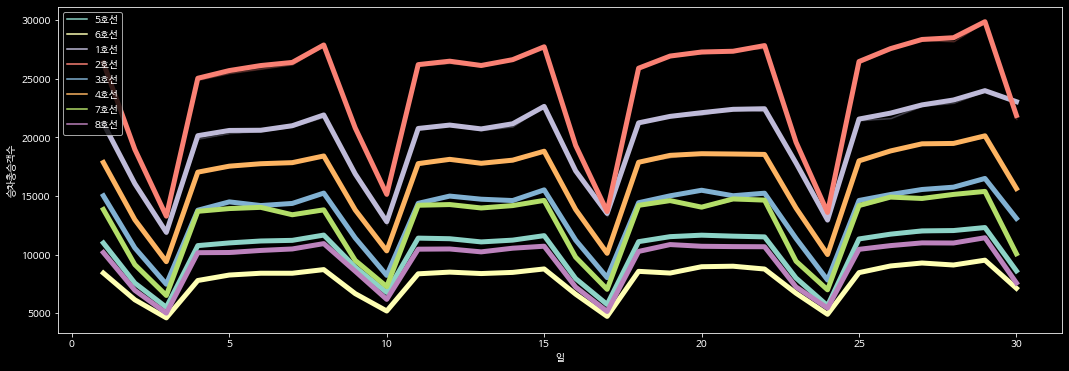

In [ ]:
plt.style.use("dark_background")
plt.figure(figsize=(18, 6))

sns.lineplot(x=df1['일'], y=df1['승차총승객수'], hue=df1['노선명'], ci=True,linewidth=5)
plt.legend(loc='upper left' , fontsize = 10) 
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

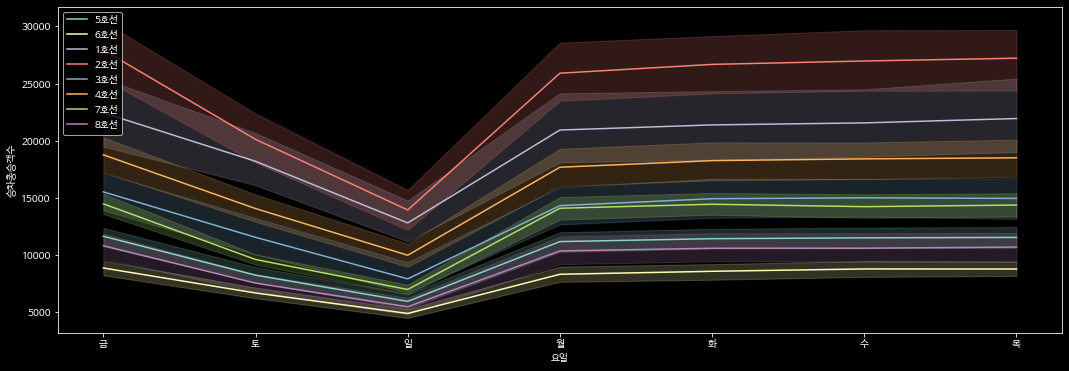

In [ ]:
plt.style.use("dark_background")
plt.figure(figsize=(18, 6))

sns.lineplot(x=df1['요일'], y=df1['승차총승객수'],  hue=df1['노선명'])
plt.legend(loc='upper left' , fontsize = 10) 
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

### 3.4 지도시각화

In [ ]:
def getLineNumber(data):
    data = str(data)
    return int(data[0])

In [ ]:
df1['노선번호'] = df1['노선명'].apply(getLineNumber).copy()

<ipython-input-34-27fa2cfd8856>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df = pd.merge(df1, df2, left_on='역명', right_on='역명')

In [ ]:
df_max = df.groupby(by=['역명'])['승차총승객수','호선', '경도', '위도'].max()

<ipython-input-44-f9961f9425cc>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
df_max

,승차총승객수,호선,경도,위도
역명,,,,
가락시장,9977,8,127.118279,37.493004
가산디지털단지,47189,7,126.882704,37.480376
강남,93091,2,127.027539,37.497958
강남구청,17228,7,127.041220,37.517185
강동,19540,5,127.132490,37.535810
...,...,...,...,...
혜화,38766,4,127.001759,37.582116
홍대입구,76902,2,126.923643,37.556748
홍제,19151,3,126.944092,37.588851


In [ ]:
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,일,요일,노선번호,연번,호선,역번호,경도,위도,데이터기준일자
0,2022-04-01,5호선,방이,6817,6943,1,금,5,168,5,2557,127.126054,37.508752,1996-06-29
1,2022-04-02,5호선,방이,5275,5129,2,토,5,168,5,2557,127.126054,37.508752,1996-06-29
2,2022-04-03,5호선,방이,3707,3559,3,일,5,168,5,2557,127.126054,37.508752,1996-06-29
3,2022-04-04,5호선,방이,6606,6941,4,월,5,168,5,2557,127.126054,37.508752,1996-06-29
4,2022-04-05,5호선,방이,6836,7020,5,화,5,168,5,2557,127.126054,37.508752,1996-06-29


In [ ]:
df_mean.loc['시청']

18937.683333333334

In [ ]:
import folium

lat = df['위도'].mean()
long = df['경도'].mean()

#지도 띄우기
m = folium.Map([lat,long], zoom_start=12)

# 노선별 컬러 설정
color_list = ['#0D3692', '#009900', '#FF8000', '#0080FF', 
         '#8B50A4', '#C55C1D', '#666600', '#F51361']

for i in df_mean.index:
    sub_lat =  df_max.loc[i,'위도']
    sub_long = df_max.loc[i,'경도']    
    title = i#
    line_no = df_max.loc[i, '호선']
    radius = df_max.loc[title]
    # color = color_list[int(line_no) - 1]
    print(title, line_no)#, radius, color)
        
    #지도에 동그라미로 데이터 찍기    
    folium.CircleMarker([sub_lat,sub_long], color=color, radius = radius, tooltip=title).add_to(m)

# m

가락시장 8
가산디지털단지 7
강남 2
강남구청 7
강동 5
강동구청 8
강일 5
개롱 5
개화산 5
거여 5
건대입구 7
경찰병원 3
고덕 5
고속터미널 7
공덕 6
광명사거리 7
구로디지털단지 2
구산 6
구파발 3
금호 3
길동 5
길음 4
김포공항 5
까치산 5
남구로 7
남성 7
남위례 8
남태령 4
내방 7
노원 7
녹번 3
논현 7
단대오거리 8
답십리 5
당고개 4
당산 2
대청 3
대치 3
도곡 3
도림천 2
도봉산 7
독립문 3
독바위 6
돌곶이 6
동대문 4
동대입구 3
동묘앞 6
둔촌동 5
디지털미디어시티 6
뚝섬 2
뚝섬유원지 7
마곡 5
마들 7
마장 5
마천 5
마포 5
마포구청 6
망원 6
매봉 3
먹골 7
면목 7
명동 4
명일 5
모란 8
목동 5
무악재 3
문래 2
문정 8
미사 5
미아사거리 4
반포 7
발산 5
방배 2
방이 5
방화 5
버티고개 6
보라매 7
보문 6
복정 8
봉천 2
불광 6
사가정 7
사당 4
산성 8
삼각지 6
상계 4
상도 7
상수 6
상왕십리 2
상일동 5
서대문 5
서초 2
석계 6
석촌 8
선릉 2
성수 2
송정 5
송파 8
수락산 7
수서 3
수진 8
시청 2
신금호 5
신길 5
신내 6
신답 2
신당 6
신대방 2
신대방삼거리 7
신도림 2
신림 2
신사 3
신설동 2
신용산 4
신정네거리 2
신촌 2
신풍 7
신흥 8
쌍문 4
아현 2
안국 3
암사 8
압구정 3
애오개 5
약수 6
양천구청 2
양평 5
여의나루 5
여의도 5
역삼 2
역촌 6
연신내 6
영등포구청 5
영등포시장 5
오금 5
옥수 3
용답 2
우장산 5
을지로3가 3
을지로4가 5
을지로입구 2
응암 6
이대 2
이태원 6
일원 3
잠실나루 2
잠실새내 2
잠원 3
장승배기 7
장암 7
장지 8
장한평 5
제기동 1
종각 1
종로3가 5
종로5가 1
종합운동장 2
중계 7
중곡 7
중화 7
지축 3
창동 4
창신 6
천왕 7
철산 7
청구 6
청담 7
충무로 4
태릉입구 7
하계 7
하남검단산 5
하남풍산 5
학동 7
학

In [ ]:
df

,사용일자,노선명,역명_x,승차총승객수,하차총승객수,일,요일,노선번호,연번,호선,역번호,역명_y,경도,위도,데이터기준일자
0,2022-04-01,5,방이,6817,6943,1,금,5,122,5,2511,방화,126.812822,37.577669,1996-02-29
1,2022-04-01,5,방이,6817,6943,1,금,5,123,5,2512,개화산,126.806838,37.572458,1996-02-29
2,2022-04-01,5,방이,6817,6943,1,금,5,124,5,2513,김포공항,126.801273,37.562170,1996-02-29
3,2022-04-01,5,방이,6817,6943,1,금,5,125,5,2514,송정,126.812052,37.561411,1996-02-29
4,2022-04-01,5,방이,6817,6943,1,금,5,126,5,2515,마곡,126.826930,37.562182,1996-02-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335634,2022-04-30,8,남위례,3782,3871,30,토,8,272,8,2823,남한산성입구,127.159845,37.451568,1996-10-31
335635,2022-04-30,8,남위례,3782,3871,30,토,8,273,8,2824,단대오거리,127.156735,37.445057,1996-12-28
335636,2022-04-30,8,남위례,3782,3871,30,토,8,274,8,2825,신흥,127.147590,37.440952,1996-12-28
335637,2022-04-30,8,남위례,3782,3871,30,토,8,275,8,2826,수진,127.140936,37.437575,1996-12-28
